In [11]:
#Importing basic libraries
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
!pip install textblob
from textblob import TextBlob
from textblob import Word 
#This is the inbuilt sentiment analyser of nltk library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
!pip install twython
!pip install pyspellchecker
from spellchecker import SpellChecker

AttributeError: module 'nltk' has no attribute 'data'

In [9]:
df = pd.read_excel('C:/Users/H/Downloads/DATA.xlsx')
df.head()

,Emotion,Words
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [10]:
#This dataset contains emotion on one side and the keywords or dialogue representation on other side
#As the dialogues are too long and contains a lot of stopwords we need to preprocess them

This dataset contains emotion on one side and the keywords or dialogue representation on other side 

As the dialogues are too long and contains a lot of stopwords we need to preprocess them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7652 entries, 0 to 7651
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  7652 non-null   object
 1   Words    7652 non-null   object
dtypes: object(2)
memory usage: 119.7+ KB


In [12]:
#In the dataset emotions are completely like dialogues so making them into keywords by cleaning

i=0
df['tokenized_words'] = df['Words']
df['lemmatized_words'] = df['Words']
df['perfect_words'] = df['Words']
df['final_words'] = df['Words']

q = []
with open("C:/Users/H/Downloads/english-words-master/english-words-master/words.txt",'r') as f:
    for x in f:
        q.append(x)
for n in range(len(q)):
    q[n] = q[n].translate(str.maketrans('','','\n'))


In [53]:
for i in range(len(df)):
    #Changing the words to lowercase and translating them by removing punctuation
    df['Words'][i] = df['Words'][i].lower()
  
    #str.maketrans(str1,str2,str3)
    #str1 : Specifies the list of charecters that need to be replaced
    #str2 : Specifies the list of charecters with which the characters need to be replaced  
    #str3 : Specifies the list of charecters that need to be deleted
  
    df['Words'][i] = df['Words'][i].translate(str.maketrans('','',string.punctuation))
    df['Words'][i] = df['Words'][i].translate(str.maketrans('','','\r\n'))
    df['Words'][i] = df['Words'][i].translate(str.maketrans('','','ã¡'))
  
    #Tokenizing words
    df['perfect_words'][i] = []
    df['tokenized_words'][i] = word_tokenize(df['Words'][i],'english')
    for word in df['tokenized_words'][i]:
        if word in q:
            df['perfect_words'][i].append(word)



In [54]:
df['perfect_words']

0       [on, days, when, i, feel, to, partner, and, fr...
1       [every, i, imagine, that, someone, i, or, i, c...
2       [when, i, been, obviously, unjustly, treated, ...
3       [when, i, think, about, the, that, we, live, a...
4       [a, gathering, i, found, myself, involuntarily...
                              ...                        
7647    [two, years, back, someone, invited, to, the, ...
7648    [i, taken, the, responsibility, to, something,...
7649    [i, was, and, i, heard, a, loud, spitting, out...
7650    [i, not, the, homework, that, the, teacher, as...
7651    [i, shouted, and, was, always, afraid, when, i...
Name: perfect_words, Length: 7652, dtype: object

In [55]:
#lemmatizing words
for i in range(len(df)):
    p = []
    for j in range(len(df['perfect_words'][i])):
        p.append(Word(df['perfect_words'][i][j]))
    for l in range(len(p)):
        p[l] = p[l].lemmatize()
        df['lemmatized_words'][i] = p 

    
  #Correcting spelling mistakes
 # r = []
  #for m in range(len(df['lemmatized_words'][i])):
   # r.append(SpellChecker().correction(df['lemmatized_words'][i][m]))
  #df['corrected_words'][i] = r

  #Removing Stopwords
    df['final_words'][i] = [] 
    for item in df['lemmatized_words'][i]:
        if item not in stopwords.words('english'):
            df['final_words'][i].append(item)

In [56]:
df['final_words']

0       [day, feel, partner, friend, feel, experience,...
1       [every, imagine, someone, could, contact, seri...
2       [obviously, unjustly, treated, possibility, el...
3                    [think, live, relate, period, think]
4       [gathering, found, involuntarily, sitting, two...
                              ...                        
7647    [two, year, back, someone, invited, tutor, gra...
7648    [taken, responsibility, something, prepared, h...
7649    [wa, heard, loud, spitting, outside, door, tho...
7650    [homework, teacher, asked, wa, scolded, immedi...
7651        [shouted, wa, always, afraid, called, loudly]
Name: final_words, Length: 7652, dtype: object

In [57]:
pip install GetOldTweets3

Note: you may need to restart the kernel to use updated packages.


FOR MORE INFO ON GETOLDTWEETS3 LIBRARY
https://pypi.org/project/GetOldTweets3/


# SENTIMENT AND EMOTION ANALYSER

Enter the word that you want the tweets for:Sushanth Singh Rajput
Since Date(yyyy-mm-dd): 2020-06-10
Until Date(yyyy-mm-dd): 2020-06-19
Enter the number of tweets to study the emotion on: 50
bollywood shud instead be called nepotiwood ani timesnow mataonline ndtv abpmajhatv abpnews sushansinghrajput itsssr boycottkaranjohar nepotisminbollywood nepotism when the investigation is going on what was the need for u to come out with the so called the real truth why so desperate to defend u are the part of their fake nerrative spreading team who legitimise rumors into news to support them unfollowed and unsubscribed u it’s getting scary and scary load of crap part 2 sonamakapoor itsssr wo tha jo apni academics mei topper tha aur bollywood mei apne dum pe aaya tha bina kisi godfather ke aur tere to kayi baap hai industry mei tu to nangi bhi hone lag gayi thi hit hone k liye for b kuch nahi hua fuck you bitch “সব উপহারেরই একটি নির্ধারিত মূল্য থাকে। জীবনে কোন উপহার না পেলে হতাশ হয়ে পড়বেন না যে

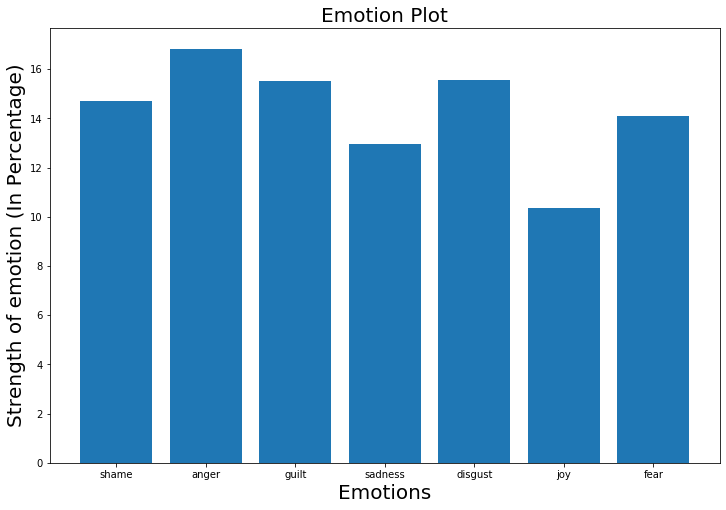

Dominated emotion among people: ANGER
Positive Score :  0.105
Neutral Score :  0.791
Negative Score :  0.105
Neutral Vibe


In [18]:
#oldtweets sentiment analyser 

from textblob import TextBlob
from textblob import Word 
import GetOldTweets3 as got

keyword = input('Enter the word that you want the tweets for:')
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                           .setSince(input('Since Date(yyyy-mm-dd): '))\
                                           .setUntil(input('Until Date(yyyy-mm-dd): '))\
                                           .setMaxTweets(int(input('Enter the number of tweets to study the emotion on: ')))
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]

    return text_tweets

#Reorganising it into text data and cleaning the text
text = ""

text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0,length):
    text = text_tweets[i][0] + " " + text

l_case = text.lower()

clean_text = l_case.translate(str.maketrans('','',string.punctuation))

tokenized_words = word_tokenize(clean_text)

q = []
with open("C:/Users/H/Downloads/english-words-master/english-words-master/words.txt",'r') as f:
    for word in f:
        q.append(word)
for i in range(len(q)):
    q[i] = q[i].translate(str.maketrans('','','\n'))

perfect_words = []
for y in tokenized_words:
    if y in q:
        perfect_words.append(y)

#Correct the spelling of words
corrected_words = []
for i in perfect_words:
    x = TextBlob(i)
    corrected_words.append(x.correct())


#Lemmatize
lemmatized_words = []
for i in corrected_words:
    i = Word(i)
    lemmatized_words.append(i.lemmatize())
f_words = []



#Creating final words
for word in corrected_words:
    if word not in stopwords.words('english'):
        f_words.append(word)

emotion_list = []

#Creating an emotion list

for item in f_words:
    for i in range(len(df)):
        if str(item) in df['final_words'][i]:
            emotion_list.append(df['Emotion'][i])


#Count of emotion
from collections import Counter
e_count = Counter(emotion_list)
#Finding the percentage of emotion (strength)
a = []
for item in e_count.values():
    per = (item/sum(e_count.values()))*100
    a.append(per)

#plotting emotions
plt.figure(figsize=(12,8))
plt.bar(e_count.keys(),a)
plt.xlabel('Emotions',fontsize=20)
plt.ylabel('Strength of emotion (In Percentage)',fontsize=20 )
plt.title('Emotion Plot',fontsize=20)
plt.savefig(keyword + '.png')
plt.show()

#Emotions that  most of the people are feeling regarding the topic
most = max(e_count.values())
for name,value in e_count.items():
    if value == most:
        print("Dominated emotion among people: {}".format(name.upper()))


#Using NLTK analyser
#We can pass cleaned text here

score = SentimentIntensityAnalyzer().polarity_scores(clean_text)
print("Positive Score : ",score['pos'])
print("Neutral Score : ",score['neu'])
print("Negative Score : ",score['neg'])

if score['pos']>score['neg']:
    print('Positive Sentiment')
elif score['neg']>score['pos']:
    print('Negative Sentiment')
else:
    print('Neutral Vibe')

In [39]:
import tkinter as tk

from tkinter import font

root = tk.Tk()

height = 800
width = 1280

canvas = tk.Canvas(root,height = height,width = width)
canvas.pack()

frame = tk.Frame(canvas,bg = 'blue',)
frame.place(relheight = 1,relwidth=1)

pic = tk.PhotoImage(file = "C:/Users/H/Documents/playlist/tweet.png")
label = tk.Label(frame,image = pic)
label.place(relheight=1,relwidth=1)

label1 = tk.Label(label,text = "SENTIMENT AND EMOTION ANALYSER FOR TWEETS",font = ('Gabriola',40,'bold'),bg = '#00aced')
label1.place(relx = .15,rely = .1,relheight=.1,relwidth=.75)

slabel = tk.Label(label,text = "Search",font = ('Gabriola',30,'bold'),bg = '#00aced')
slabel.place(relx = .25,rely = .3,relheight = .05,relwidth = .1)

search = tk.Entry(label,font = ('Gabriola',25,'bold'))
search.place(relx = .35,rely = .3,relheight = .05,relwidth = .4)

flabel = tk.Label(label,text = 'From Date (yyyy-mm-dd)',font = ('Gabriola',25,'bold'),bg = '#00aced')
flabel.place(relx = .15,rely = .4,relheight = .05,relwidth = .35)

froms = tk.Entry(label,font = ('Gabriola',25,'bold'))
froms.place(relx = .475,rely = .4,relheight = .05,relwidth = .2)

tlabel = tk.Label(label,text = 'To Date (yyyy-mm-dd)',font = ('Gabriola',25,'bold'),bg = '#00aced')
tlabel.place(relx = .15,rely = .5,relheight = .05,relwidth = .35)

to = tk.Entry(label,font = ('Gabriola',25,'bold'))
to.place(relx = .475,rely = .5,relheight = .05,relwidth = .2)

nlabel = tk.Label(label,text = 'Number of tweets to extract emotion ',font = ('Gabriola',25,'bold'),bg = '#00aced')
nlabel.place(relx = .065,rely = .6,relheight = .05,relwidth = .4)

number = tk.Entry(label,font = ('Gabriola',25,'bold'))
number.place(relx = .475,rely = .6,relheight = .05,relwidth = .2)

button = tk.Button(label,font = ('Gabriola',25,'bold'),text = 'Analyze',bg = '#ffffff',fg = '#00aced')
button.place(relx = .575,rely = .75,relheight = .05,relwidth = .1)

root.mainloop()

Enter the word that you want the tweets for:king


Since Date(yyyy-mm-dd): 2020-1-1
Until Date(yyyy-mm-dd): 2020-2-1
Enter the number of tweets to study the emotion on: 2


[['Could not say it any better....he did not bow before the King '],
 ['And soon the numbers flowing strong in pride and noon, and whence and who refuses king himself; a soft-reporting guild, the guide the flood, and wake and try, and re-in-ring.']]

Enter the word that you want the tweets for:Sushanth Singh Rajput
Since Date(yyyy-mm-dd): 2020-06-01
Until Date(yyyy-mm-dd): 2020-06-20
Enter the number of tweets to study the emotion on: 20
@itsssr


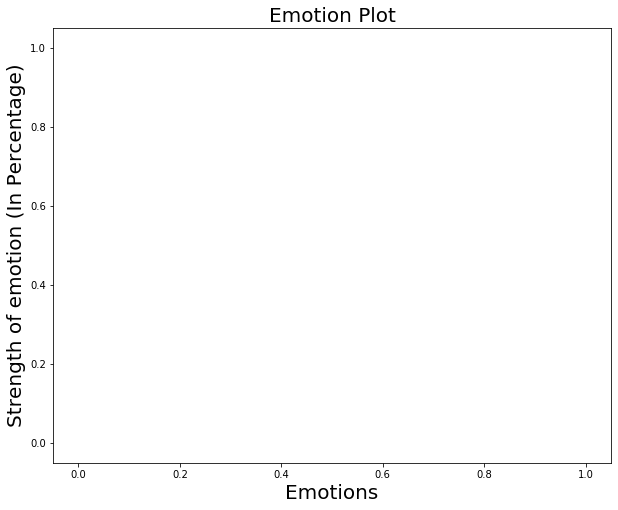

No strong emotion in text
क्या खूब लिखा है ।। #sushantsingh #sushanthsinghrajput 


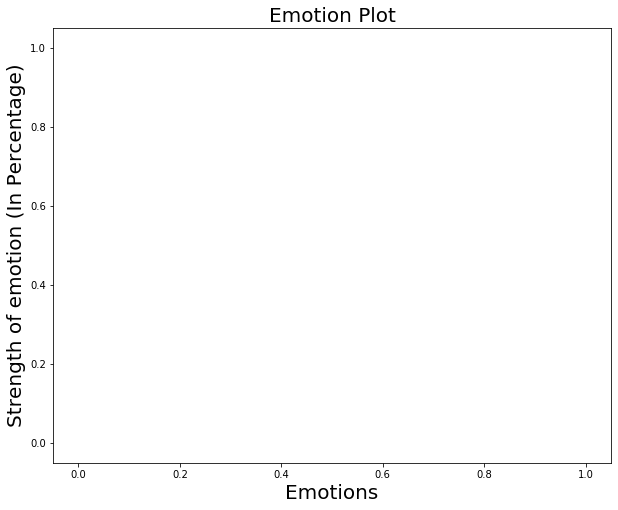

No strong emotion in text
 


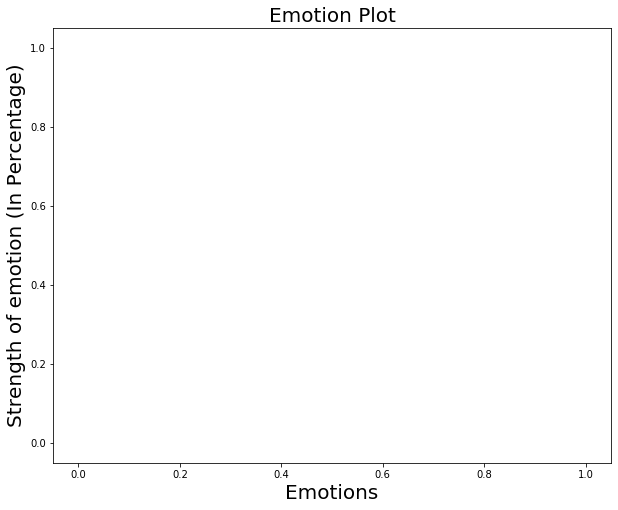

No strong emotion in text
you were great! @itsssr


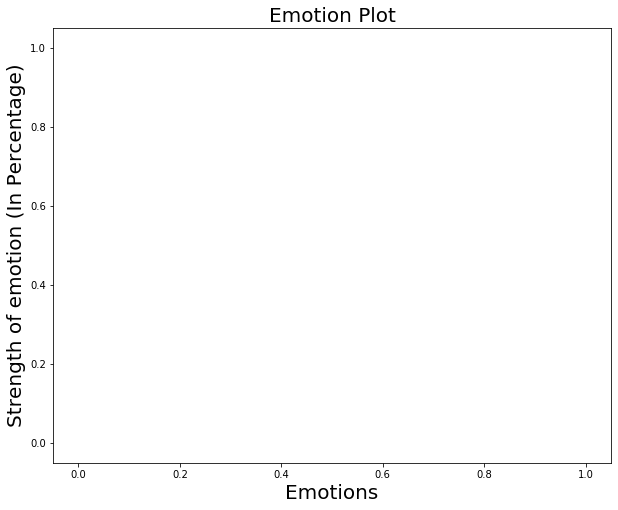

No strong emotion in text
@rsprasad there must be a law which holds these journalists accountable &amp; culpable in abatement of @itsssr suicide.@anildeshmukhncp


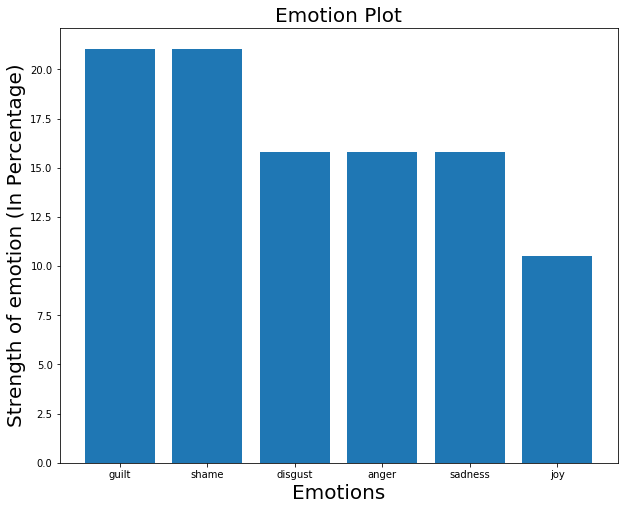

Dominated emotion : GUILT
Dominated emotion : SHAME
Positive Score :  0.0
Neutral Score :  1.0
Negative Score :  0.0
Neutral Vibe
@shomachaudhury i saw your interview with @abhishekapoor, the entire interview went well..eye opening, but you lost my respect by asking a grieving man did he expect his prodigy #sushanthsinghrajput to be driven suicide! #disrespectful his pause in the end made me cry. #sick


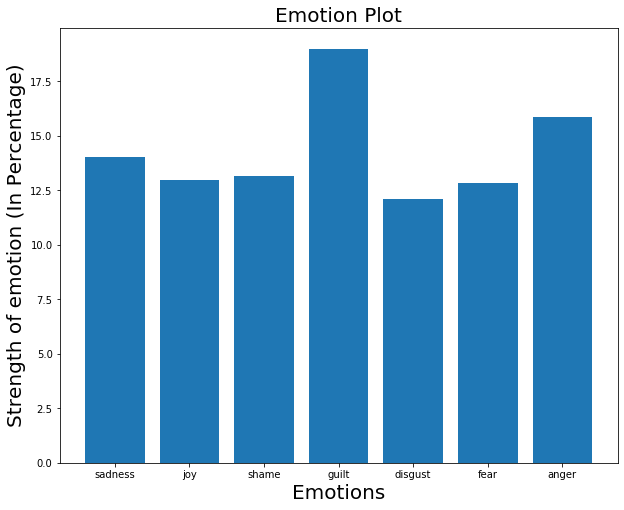

Dominated emotion : GUILT
Positive Score :  0.068
Neutral Score :  0.57
Negative Score :  0.362
Negative Sentiment
bollywood gandegi,,, porn star


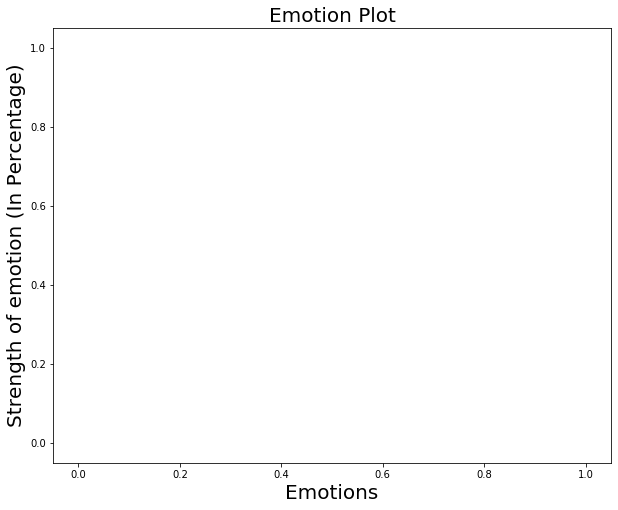

No strong emotion in text
retweet if you want cbi enquiry for sushant singh’s case. #cbienquiryforsushant #cbiinvestigationforsushant #sushanthsinghrajput 


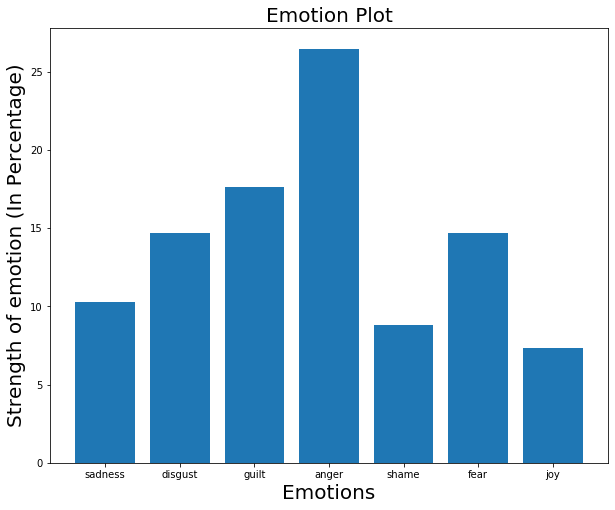

Dominated emotion : ANGER
Positive Score :  0.098
Neutral Score :  0.902
Negative Score :  0.0
Positive Sentiment
@rajeevmasand so you have decided to stay silent about #justiceforsushantsinghrajput death(murder) why don’t you write an article now? @itsssr will now see the people take you all down! shame on you, karma will hit you in the hardest way possible #cbienquiryforsushant


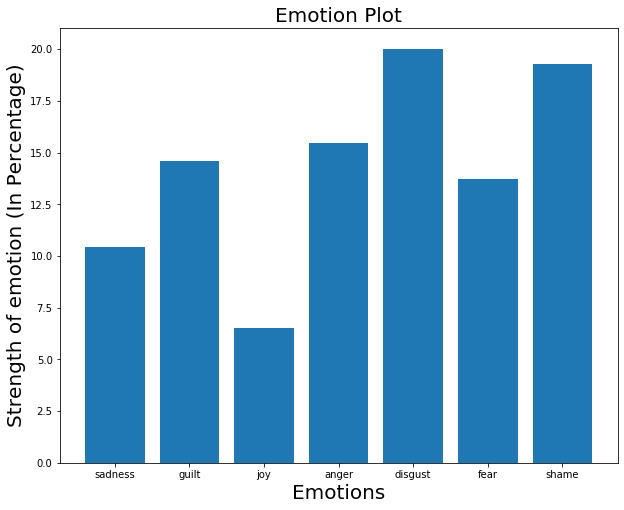

Dominated emotion : DISGUST
Positive Score :  0.0
Neutral Score :  0.928
Negative Score :  0.072
Negative Sentiment
kuch khandani bollywood log islie bhi dar gaye ki fir se koi rajiv hariom bhatia se @akshaykumar na ban jaaye... @itsssr #nepotism @beingsalmankhan @karanjohar @ektarkapoor #godwillseeyou... #eachandeveryoneofyouall..


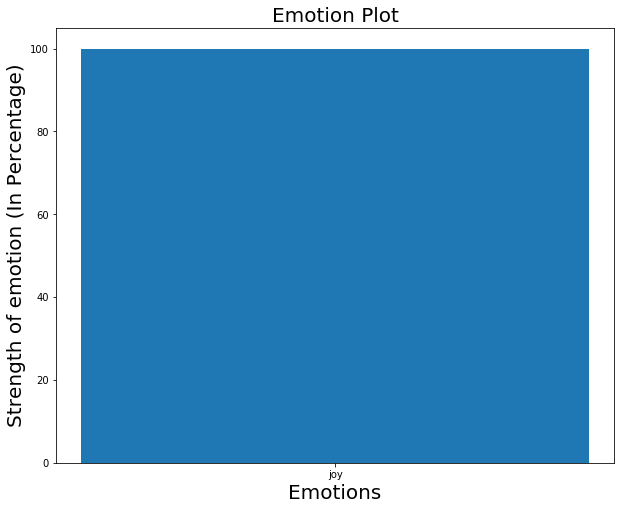

Dominated emotion : JOY
Positive Score :  0.0
Neutral Score :  0.878
Negative Score :  0.122
Negative Sentiment
dear @pmo india we want cbi inquiry for @itsssr murder case it is not a suicide some big faces of bollywood forced him to do that 


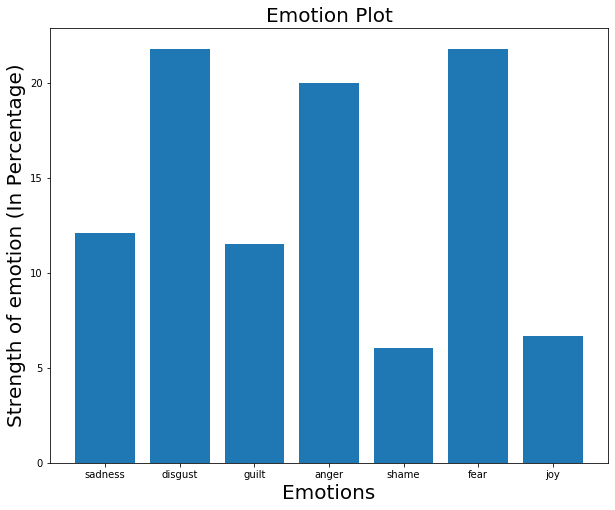

Dominated emotion : DISGUST
Dominated emotion : FEAR
Positive Score :  0.213
Neutral Score :  0.568
Negative Score :  0.219
Negative Sentiment
i’m noun in your life, verb in mine! - #selfmusing by #sushantsinghrajput @itsssr @selfmusing #alwaysalive 


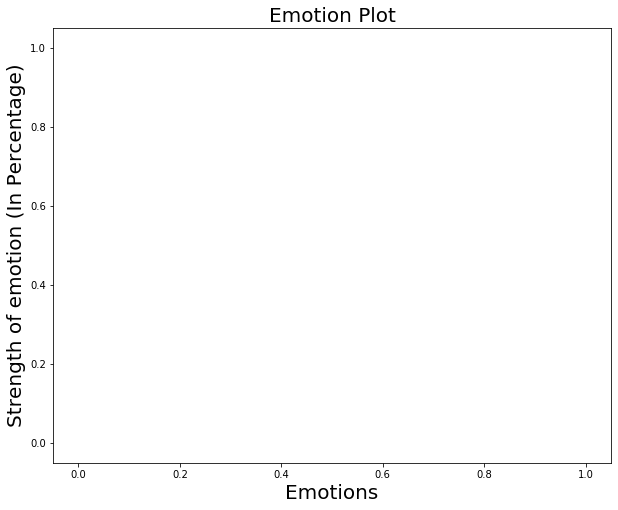

No strong emotion in text
 


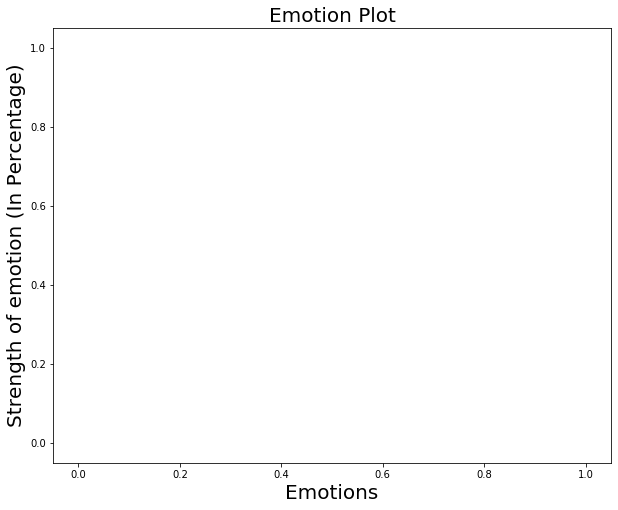

No strong emotion in text
whole is greater than some of its value! - #selfmusing by #sushantsinghrajput @itsssr @selfmusing #alwaysalive https://selfmusing.com/?fbclid=iwar3hb_y5xscfbskfht8v_vhe7e-ziq3_ji6mxndkaek_jvvrwdboviyqud4


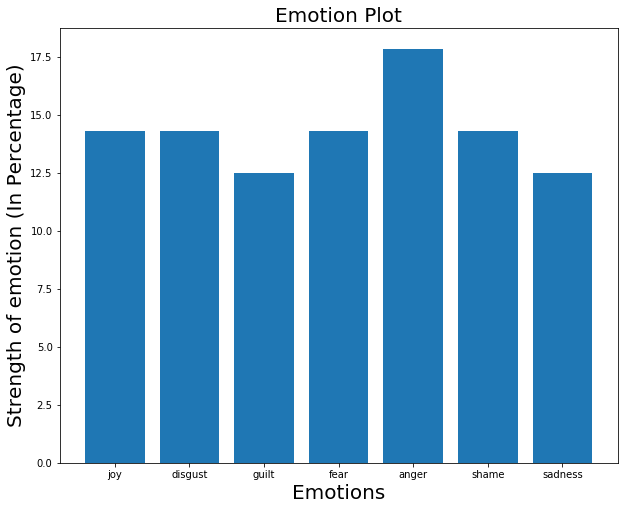

Dominated emotion : ANGER
Positive Score :  0.274
Neutral Score :  0.726
Negative Score :  0.0
Positive Sentiment
not only for indian people we have also the same feelings for sushant sir its such news shushant was ,isnd always will remain a international super shiningstar love from germany rest in peace sushi u r in our heart nd alwys will be @itsssr #justiceforsushantsinghrajput


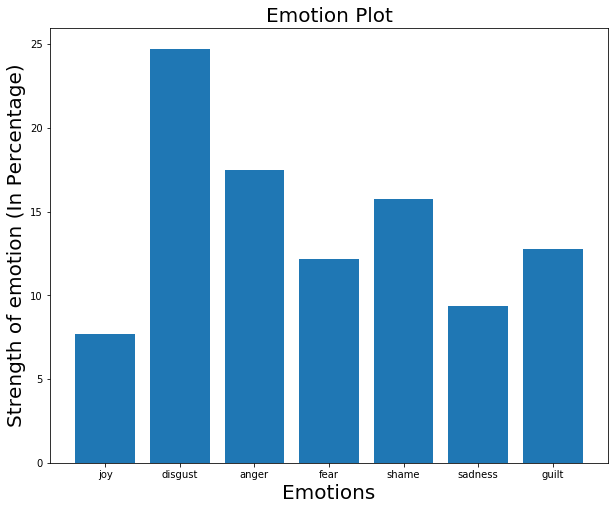

Dominated emotion : DISGUST
Positive Score :  0.229
Neutral Score :  0.771
Negative Score :  0.0
Positive Sentiment
#sushantsingrajput: सुशांत सिंह राजपूत की गर्लफ्रेंड रिया चक्रवर्ती की महेश भट्ट संग बिस्तर वाली फोटो हुई viral, फैंस ने उठाए कई सवाल #cbienquiryforsushant #cbiinvestigationforsushant #sushanthsinghrajput #bollywoodblockedsushant #bollywoodnepotism…


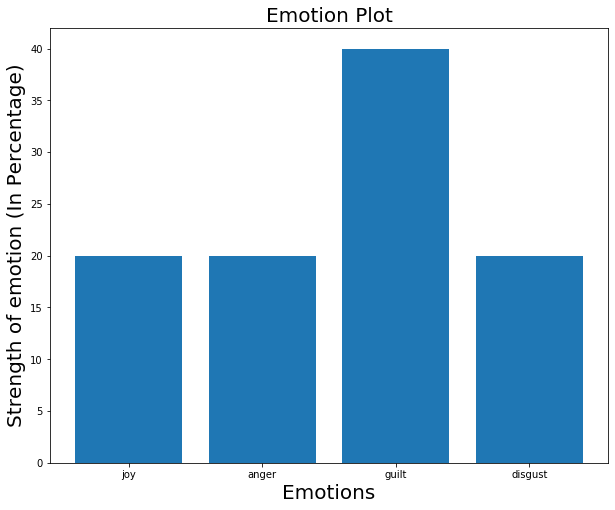

Dominated emotion : GUILT
Positive Score :  0.0
Neutral Score :  1.0
Negative Score :  0.0
Neutral Vibe
wo divorci ni hai. kareena anuty to dusre auroto ke pariyar todne me maza aata hai. that’s why she indirectly told marry someone divorci man. with zero iq


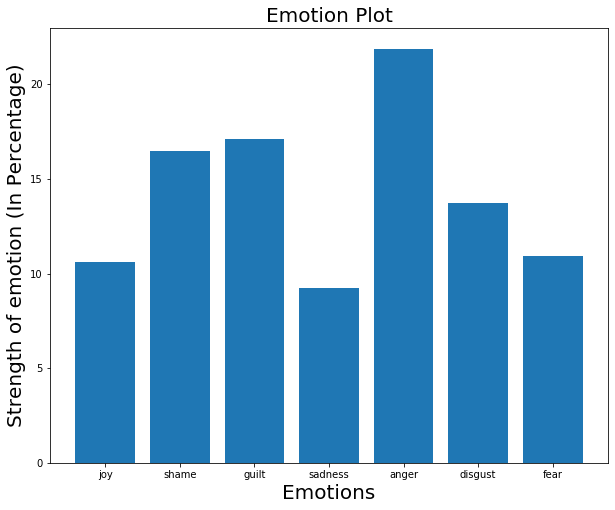

Dominated emotion : ANGER
Positive Score :  0.0
Neutral Score :  1.0
Negative Score :  0.0
Neutral Vibe
 


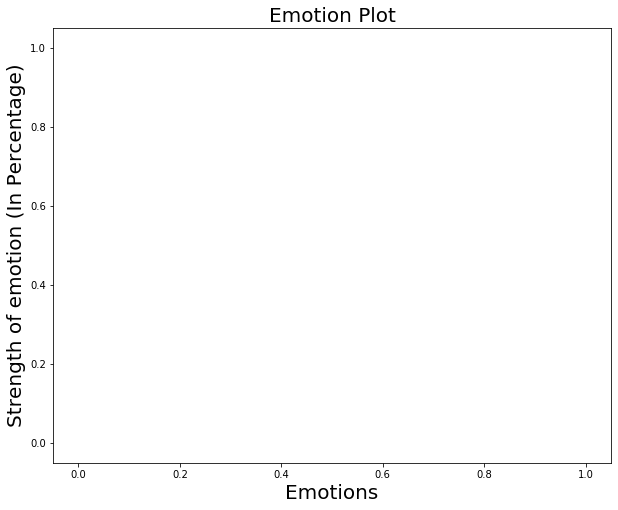

No strong emotion in text
he was better looking than you and an even better actor than you !!


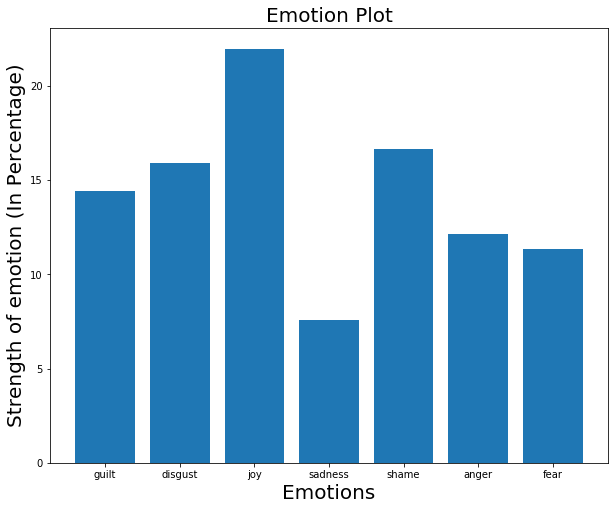

Dominated emotion : JOY
Positive Score :  0.345
Neutral Score :  0.655
Negative Score :  0.0
Positive Sentiment
wow 


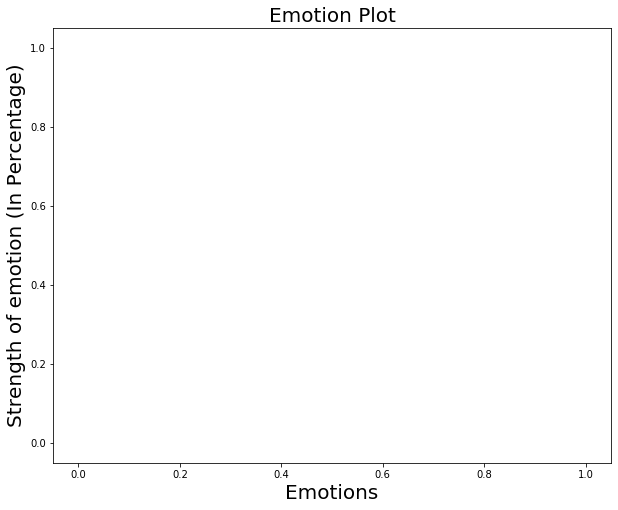

No strong emotion in text


In [65]:
from textblob import TextBlob
from textblob import Word 
import GetOldTweets3 as got
import string

keyword = input('Enter the word that you want the tweets for:')
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                           .setSince(input('Since Date(yyyy-mm-dd): '))\
                                           .setUntil(input('Until Date(yyyy-mm-dd): '))\
                                           .setMaxTweets(int(input('Enter the number of tweets to study the emotion on: ')))
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]

    return text_tweets

q = []
with open("C:/Users/H/Downloads/english-words-master/english-words-master/words.txt",'r') as f:
    for word in f:
        q.append(word)
for i in range(len(q)):
    q[i] = q[i].translate(str.maketrans('','','\n'))
#Reorganising it into text data and cleaning the text
text = ""

text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0,length):
    text = text_tweets[i][0]

    l_case = text.lower()

    clean_text = l_case.translate(str.maketrans('','',string.punctuation))

    tokenized_words = word_tokenize(clean_text)

    print(l_case)

    perfect_words = []
    for y in tokenized_words:
        if y in q:
            perfect_words.append(y)

#Correct the spelling of words
    corrected_words = []
    for o in perfect_words:
        x = TextBlob(o)
        corrected_words.append(x.correct())


#Lemmatize
    lemmatized_words = []
    for z in corrected_words:
        z = Word(z)
        lemmatized_words.append(z.lemmatize())
    f_words = []



#Creating final words
    for word in corrected_words:
        if word not in stopwords.words('english'):
            f_words.append(word)
    
    f_words = [" ".join(x) for x in f_words.values]

    emotion_list = []

#Creating an emotion list

    for item in f_words:
        for s in range(len(df)):
            if str(item) in df['final_words'][s]:
                emotion_list.append(df['Emotion'][s])


#Count of emotion
    from collections import Counter
    e_count = Counter(emotion_list)
#Finding the percentage of emotion (strength)
    a = []
    for item in e_count.values():
        per = (item/sum(e_count.values()))*100
        a.append(per)

#plotting emotions
    plt.figure(figsize=(10,8))
    plt.bar(e_count.keys(),a)
    plt.xlabel('Emotions',fontsize=20)
    plt.ylabel('Strength of emotion (In Percentage)',fontsize=20 )
    plt.title('Emotion Plot',fontsize=20)
    #plt.savefig(keyword + '.png')
    plt.show()

#Emotions that  most of the people are feeling regarding the topic
    try:
        most = max(e_count.values())
        for name,value in e_count.items():
            if value == most:
                print("Dominated emotion : {}".format(name.upper()))
    except ValueError as e:
        print('No strong emotion in text')
        continue

#Using NLTK analyser
#We can pass cleaned text here

    score = SentimentIntensityAnalyzer().polarity_scores(clean_text)
    print("Positive Score : ",score['pos'])
    print("Neutral Score : ",score['neu'])
    print("Negative Score : ",score['neg'])

    if score['pos']>score['neg']:
        print('Positive Sentiment')
    elif score['neg']>score['pos']:
        print('Negative Sentiment')
    else:
        print('Neutral Vibe')
        
    tokenized_words = []
    perfect_words = []
    corrected_words = []
    lemmatized_words = []
    emotion_list = []
    a = []

In [15]:

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np

In [16]:
df = pd.read_excel("C:/Users/H/Downloads/DATA.xlsx")

In [17]:
df.head()

,Emotion,Words
0,joy,[ On days when I feel close to my partner and ...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [18]:
df['Words'] = df['Words'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,Emotion,Words
0,joy,[ on days when i feel close to my partner and ...
1,fear,every time i imagine that someone i love or i ...
2,anger,when i had been obviously unjustly treated and...
3,sadness,when i think about the short time that we live...
4,disgust,at a gathering i found myself involuntarily si...


In [19]:
df['Words'] = df['Words'].str.replace('[^\w\s]','')
df.head()

,Emotion,Words
0,joy,on days when i feel close to my partner and o...
1,fear,every time i imagine that someone i love or i ...
2,anger,when i had been obviously unjustly treated and...
3,sadness,when i think about the short time that we live...
4,disgust,at a gathering i found myself involuntarily si...


In [20]:
stop = stopwords.words('english')
df['Words'] = df['Words'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,Emotion,Words
0,joy,days feel close partner friends ã feel peace a...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility ã eluci...
3,sadness,think short time live relate ã periods life th...
4,disgust,gathering found involuntarily sitting next two...


In [21]:
st = PorterStemmer()
df['Words'] = df['Words'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head()

,Emotion,Words
0,joy,day feel close partner friend ã feel peac also...
1,fear,everi time imagin someon love could contact ã ...
2,anger,obvious unjustli treat possibl ã elucid
3,sadness,think short time live relat ã period life thin...
4,disgust,gather found involuntarili sit next two ã peop...


In [22]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['Words'] = df['Words'].apply(lambda x: " ".join([lem.lemmatize(word) for word in x.split()]))
df.head()

,Emotion,Words
0,joy,day feel close partner friend ã feel peac also...
1,fear,everi time imagin someon love could contact ã ...
2,anger,obvious unjustli treat possibl ã elucid
3,sadness,think short time live relat ã period life thin...
4,disgust,gather found involuntarili sit next two ã peop...


In [31]:
df['Words']=[" ".join(x) for x in df['Words'].values]
df.head()

,Emotion,Words
0,joy,day feel close partner friend ã feel peac also...
1,fear,everi time imagin someon love could contact ã ...
2,anger,obvious unjustli treat possibl ã elucid
3,sadness,think short time live relat ã period life thin...
4,disgust,gather found involuntarili sit next two ã peop...


In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest= train_test_split(df['Words'], df['Emotion'], test_size=0.3)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(5356,)
(2296,)
(5356,)
(2296,)


In [33]:
xtrain

2065    tender age eleven friend left parti ã proceed ...
5345    cambridg result came obtain first ã divis thin...
4559    spend summer holiday villag friend ã come back...
6793                  felt joy heard select colleg ã educ
4045    someon made compliment examin ã moment need am...
                              ...                        
2742                                            car accid
2343    felt shame talk person hadnt seen ã mani year ...
3886                  didnt take time make appoint someon
1591                      reprov eighth grade high school
7598    whenev father smoke smell make feel ã uncomfor...
Name: Words, Length: 5356, dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder
Lb = LabelEncoder()
ytrain=Lb.fit_transform(ytrain)
ytest=Lb.transform(ytest)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfvect=TfidfVectorizer(analyzer='word',max_features=1000)
tfvect=tfvect.fit(df['Words'])

xtrain_new=tfvect.transform(xtrain)
xtest_new=tfvect.transform(xtest)

In [41]:
def train_model(classifier, xtrain, ytrain, xtest, ytest):
    mod=classifier.fit(xtrain, ytrain)
    predictions=mod.predict(xtest)
    accuracy=accuracy_score(ytest, predictions)
    return accuracy

In [43]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes

In [44]:
accuracy = train_model(RandomForestClassifier(), xtrain_new, ytrain, xtest_new, ytest)

print(accuracy)

0.5383275261324042


In [45]:
accuracy = train_model(naive_bayes.MultinomialNB(),xtrain_new, ytrain, xtest_new, ytest)
print(accuracy)

0.5400696864111498


In [61]:
from sklearn.svm import SVC
lord = SVC(C=10,gamma=.1).fit(xtrain_new,ytrain)
predictions = lord.predict(xtest_new)
a = accuracy_score(ytest,predictions)
print(a)

0.539198606271777


In [62]:
print(Lb.inverse_transform(lord.predict(tfvect.transform(['I am sad'])))[0])

sadness


In [65]:
from textblob import TextBlob
from textblob import Word 
import GetOldTweets3 as got
import string

keyword = input('Enter the word that you want the tweets for:')
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                           .setSince(input('Since Date(yyyy-mm-dd): '))\
                                           .setUntil(input('Until Date(yyyy-mm-dd): '))\
                                           .setMaxTweets(int(input('Enter the number of tweets to study the emotion on: ')))
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]

    return text_tweets
text = ""

text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0,length):
    text = text_tweets[i][0]

    l_case = text.lower()

    clean_text = l_case.translate(str.maketrans('','',string.punctuation))
    
    print(clean_text+': '+Lb.inverse_transform(lord.predict(tfvect.transform([clean_text])))[0])
    print()

Enter the word that you want the tweets for:Changes
Since Date(yyyy-mm-dd): 2020-1-1
Until Date(yyyy-mm-dd): 2020-6-1
Enter the number of tweets to study the emotion on: 5
yh but america is at a point where the corporations can pay for stuff to go away and unless actual real action is taken nothing will really actually change: anger

xrc market metrics  price 532  24h change 085  market cap 511m  circulating supply 95902k xrc  max supply 21m  cmc rank 516 crypto cryptonews blockchain: joy

how many decades ago you keep living in the past if you want change youll need to believe that many will have to act and think different than many decades ago: disgust

mayor jacob frey justice for george floyd  sign the petition httpchngitdyycmc6z via change: joy

mayor jacob frey justice for george floyd  sign the petition httpchngitl4mxhyww via change: joy



In [6]:
from textblob import TextBlob
from textblob import Word 
import GetOldTweets3 as got
import string

keyword = input('Enter the word that you want the tweets for:')
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                           .setSince(input('Since Date(yyyy-mm-dd): '))\
                                           .setUntil(input('Until Date(yyyy-mm-dd): '))\
                                           .setMaxTweets(int(input('Enter the number of tweets to study the emotion on: ')))
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]

    return text_tweets


text = ""

text_tweets = get_tweets()
length = len(text_tweets)

for i in range(0,length):
    text = text_tweets[i][0]

    l_case = text.lower()

    clean_text = l_case.translate(str.maketrans('','',string.punctuation))

    tokenized_words = word_tokenize(clean_text)

   

    perfect_words = tokenized_words
    #for y in tokenized_words:
     #   if y in q:
      #      perfect_words.append(y)

#Correct the spelling of words
    corrected_words = []
    for o in perfect_words:
        x = TextBlob(o)
        corrected_words.append(x.correct())


#Lemmatize
    lemmatized_words = []
    for z in corrected_words:
        z = Word(z)
        lemmatized_words.append(z.lemmatize())
    f_words = []

    

#Creating final words
    for word in corrected_words:
        if word not in stopwords.words('english'):
            f_words.append(word)
    
    name = ' '        
    for u in f_words:
        name = name.join(u) 

    print(l_case+ ': ' + Lb.inverse_transform(lord.predict(tfvect.transform([name]))[0]))
    

KeyboardInterrupt: 